In [34]:
using PastaQ
using ITensors
using PyPlot

In [2]:
#From run_random_circuit.jl
function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

function run(N, depth)
    # Random circuit.
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end

    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

In [3]:
# Since each data matrix compoenets have "Pair"- We just want to get only values.
# Function to extract values from pair

function getValue(P::Pair)
    return P[2]
end

getValue (generic function with 1 method)

In [4]:
# Convert Matrix -> Vector to extract information easily
function BinaryToDecimal(M,N)
    idx = zeros(Int8,size(M)[1],1)
    for i in 1:N
        idx += M[:,i].*2^(i-1)
    end
    
    return idx
end

BinaryToDecimal (generic function with 1 method)

In [5]:
# Generate initial Count dictionary
function Init_Count_Generator(N)
    Count = Dict{Int64,Int64}()
    for i in 0:2^N-1
        push!(Count,i=>0)
    end

    return Count = sort((Count))
end   

Init_Count_Generator (generic function with 1 method)

In [6]:
# Get Probabilities dictionary
function get_probabilities(Count,N)
    Prob = Dict{Int64,Float64}()
    Total_shots = sum(values(Count))
    for i in 0:2^N-1
        push!(Prob,i=>(Count[i]/Total_shots))
    end
    
    return sort(Prob)
end

get_probabilities (generic function with 1 method)

In [7]:
function get_counts(Count,V)
    Keys = keys(Count)
    for k in Keys
        Count[k]+=count(i->(i==k),V)
    end
    return Count
end


get_counts (generic function with 1 method)

In [8]:
# From sampling of state to Decimal representation vector
function execute(ψ,N,shots)
    data = getsamples(ψ, shots ,local_basis=["Z"])
    B = getValue.(data)
    C = BinaryToDecimal(B,N)
    return C
end

execute (generic function with 1 method)

In [31]:
N = 4 # The number of Qubit
D = 10 # Depth of Circuit
shots = 1024 # The number of shot
Count = Init_Count_Generator(N) # Dictionary for counting result

ϕ = run(N,D) # Get state
shot_result = execute(ϕ,N,shots) # Get decimal representation of shot result(Vector)
Count = get_counts(Count,shot_result) # Get Counts from shot_result
Prob = get_probabilities(Count,N) # Get probabilities from Count

OrderedCollections.OrderedDict{Int64, Float64} with 16 entries:
  0  => 0.0439453
  1  => 0.0488281
  2  => 0.133789
  3  => 0.046875
  4  => 0.0117188
  5  => 0.0507812
  6  => 0.228516
  7  => 0.0205078
  8  => 0.110352
  9  => 0.0136719
  10 => 0.0478516
  11 => 0.0585938
  12 => 0.12207
  13 => 0.0175781
  14 => 0.00195312
  15 => 0.0429688

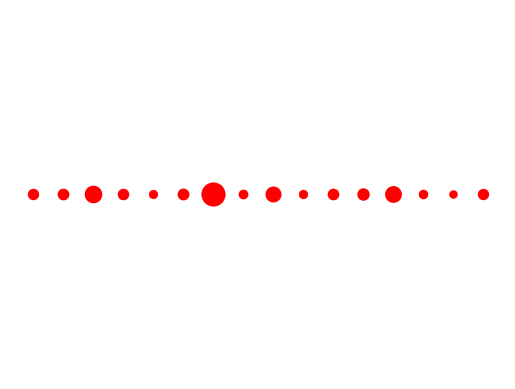

(-0.75, 15.75, -0.05500000000000001, 0.05500000000000001)

In [38]:
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=50.0*Prob[i])
end
axis("off")